# War Presidents Inaugural Addresses: NLP Analysis

<i>By: Tighe Clough</i>

Inaugural addresses shape the expectation of the US populace. Such a speech "addresses" the entire nation regardless of difference in opinion. The weight of its messaging has expanded to the rest of the world in relation to America's developing importance in world affairs. This messaging goes so far as to shape reality. People often judge a president from their persona and public relation skill rather than scrutinize the fine details of their actions and executed policy. 

During war, a president's words are particularly important because they serve to glue the country together to preserve American ideals or even the country itself. Therefore, it is of interest to compare how presidents purpose the inaugural address during war, or during the immediate lead-up to its formal declaration. I have chosen six addresses from such times: Lincoln's in 1861 (lead-up to Civil War), Wilson's in 1917 (WWI), Roosevelt's in 1941 (lead-up to WWII), 'Eisenhower's in 1953 (Korean War)', Nixon's in 1969 (Vietnam War)', and W Bush's in 2005 (War on Terror). This analysis leads to a deeper understanding of the general purpose of the inaugural address and the historical context of the selected addresses.

In [1]:
from pathlib import Path
import wordcloud as wc
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import rcParams
import numpy as np
import pandas as pd
from textblob import TextBlob
from collections import Counter
import seaborn as sns
import plotly.graph_objects as go
import imageio
import re
import os

In [26]:
def usa_cloud(text):
    """Creates wordcloud object with USA colors
    
    Parameter
    ---------
    text : string
        body of text to visualize with word cloud
    
    Returns
    -------
    final_cloud : word cloud object
        Red, white, and blue colored rectangular word cloud
    
    """
    # custom font
    optima_path = os.getcwd() + 'data/Optima.ttc'
    
    # colors for cloud
    flag1 = cm.get_cmap('bwr',4)
    
    # create cloud object
    cloud = wc.WordCloud(font_path=optima_path,
                         width=400, 
                         height=200, 
                         colormap=flag1, 
                         background_color = 'white')
    
    # generate wordcloud with the correct text
    final_cloud = cloud.generate(text)
    
    return final_cloud

def cloud_plot(clouds, titles):
    """Creates plot of subplots for given clouds and titles
    
    Parameters
    ----------
    clouds : array-like
        list of word cloud objects to include in figure
    titles : array-like
        list of titles corresponding to word cloud objects
    
    """

    fig = plt.figure(figsize=(10,5), dpi=1000, tight_layout=True)
    fig.suptitle("Word Clouds of Wartime Presidents Inaugural Addresses")
    
    # add subplots to plot
    for i in range(len(titles)):
        n_rows=-(-len(titles)//2)
        # put subplot in correct position
        fig.add_subplot(n_rows,2,i+1)
        
        # show cloud in subplot
        plt.imshow(clouds[i])
        
        # give correct title
        plt.title(titles[i], size=8)
        
        # turn off axes
        plt.axis('off')

# sentiment analysis functions
        
def split_sentences(text_str):
    """Splits body of text (string) into list of sentences
    
    Parameter
    ---------
    text_str : str
        body of text to split into sentences
    
    Returns
    -------
    text_str_list : array-like
        list of sentences from text_str
    
    """
    
    # Remove new line characters
    text_str = re.sub('\n+',' ',text_str)
    
    # Fix 'Mr. ' special Cases (these cause unwanted splits in sentences)
    text_str = re.sub('Mr. ','Mr.', text_str)
    
    # Special case for splitting, where quote with period ends sentence
    text_str = re.sub("(\.\")","\".",text_str)
    
    # Split by sentence using lookbehind
    text_str = re.split('(?<=[\.\?!])\s',text_str)
    
    return text_str

def score_sentences(sentences, minsub=0.0, maxsub=1.0, minpol=-1.0, maxpol=1.0):
    """ Score each sentence for sentiment (subjectivity/polarity)
    and return as a dictionary (sentence --> (pol,subj))
     
    Parameters
    ----------
    sentences : array-like
        list of sentences to score
    minsub : float >= 0.0, optional
        minimum subjectivity threshold for sentences
    maxsub : float <= 1.0, optional
        maximum subjectivity constraint for sentences
    minpol : float >= -1.0, optional
        minimum polarity threshold for sentences
    maxpol : float <= 1.0, optional
        maximum polarity constraint for sentences
    
    Returns
    -------
    filtered : dict
        {sentence --> (polarity score, subjectivity score)}
    """
    
    # initialize dictionaries
    filtered = {}
    
    # loop through sentences and sentiment score each one
    for sentence in sentences:
        pol, sub = TextBlob(sentence).sentiment
        # add to dictionary if meet constraints
        if minpol <= pol <= maxpol and minsub <= sub <= maxsub:
            filtered[sentence] = (pol,sub)

    return filtered

def pol_vs_subj(scored_sentences, president_title, cur_ax, clr='black'):
    """ Scatterplot with kde overlay of polarity vs subjectivity for sentences in a speech
    
    Parameters
    ----------
    scored_sentences : dict
        {sentence --> (polarity score, subjectivity score)} dictionary
    president_title : str
        name of president to which the dictionary correponds to
    clr : str, optional
        color for scatteplot dots
    cur_ax : matplotlib.pyplot.axis
        axis to graph on
    """
    
    # retrieve list of scores for each sentence
    scores = scored_sentences.values()
    polarity = [x[0] for x in scores]
    subjectivity = [x[1] for x in scores]

    # graph the scatterplot
    sns.scatterplot(x=subjectivity, y=polarity, s=10, color=clr, ax=cur_ax)
    cur_ax.set_xlabel('Subjectivity', size=15)
    cur_ax.set_xlim(0,1)
    cur_ax.set_ylabel('Polarity', size=15)
    cur_ax.set_ylim(-1,1)
    cur_ax.set_title(president_title, size=15)
    
    # layer on kde
    sns.kdeplot(x=subjectivity, y=polarity, color='grey', ax=cur_ax)

def pol_vs_subj_fig():
    """graph polarity vs subjectivity for each president"""
    fig, axs = plt.subplots(2,3,dpi=120)
    fig.set_size_inches(14,9)
    fig.suptitle("Wartime Presidents Inaugural Addresses Sentiment Plots (Polarity vs. Subjectivity) \n (Each dot = one sentence)",
                 size=20, 
                 y=.92)
    fig.tight_layout(pad=4) 

    pol_vs_subj(lincoln_score, titles[0], clr='red', cur_ax=axs[0,0])
    pol_vs_subj(wilson_score, titles[1], clr='blue', cur_ax=axs[0,1])
    pol_vs_subj(roosevelt_score, titles[2], clr='blue', cur_ax=axs[0,2])
    pol_vs_subj(eisenhower_score, titles[3], clr='red', cur_ax=axs[1,0])
    pol_vs_subj(nixon_score, titles[4], clr='red', cur_ax=axs[1,1])
    pol_vs_subj(wbush_score, titles[5], clr='red', cur_ax=axs[1,2])
    
def create_pol_dict(sentiment_scores):
    """Create dictionary of polarity scores
    
    Parameter
    ---------
    sentiment_scores : dict
        {sentence --> (polarity score, subjectivity score)} dictionary
    
    Returns
    -------
    pol_dict : dict
        {sentence number --> polarity score} dictionary
    
    """
    
    pols_list = enumerate([scores[0] for scores in sentiment_scores.values()],start = 1)
    
    pol_dict = {sentence_num: score for sentence_num, score in pols_list}
    
    return pol_dict

def create_subj_dict(sentiment_scores):
    """Create dictionary of sujectivity scores 
    
    Parameter
    ---------
    sentiment_scores : dict
        {sentence --> (polarity score, subjectivity score)}
    Returns
    -------
    subj_dict : dict
        {sentence number --> subjectivity score} 
    
    """
    subj_list = enumerate([scores[1] for scores in sentiment_scores.values()],start = 1)
    
    subj_dict = {sentence_num: score for sentence_num, score in subj_list}
    
    return subj_dict

def moving_average(score_dict, window_reach=10):
    """ Compute moving average usubg a specified window size
    Specifically: +/- window_size/2
    
    Parameter
    ---------
    score_dict : dict
        {sentence number --> score}
    
    window_reach : int, optional    
        amount of preceding and following sentences to include in the moving average calculation
        ex. window_reach of 5 will inlude 5 preceding and 5 following for a total of 11 entries included
    
    Returns
    -------
    moving_average : dict
        {sentence number --> moving average score}
    """
    
    # initialize moving_average dictionary for each 
    moving_average = {}
    
    # For each data point, accumulate all the relevant values
    for sent_num in score_dict:
        moving_average[sent_num] = []
        for window_num, score in score_dict.items():
            if abs(sent_num - window_num) <= window_reach:
                moving_average[sent_num].append(score)
                
    # Convert each aggreage (window values) to an average
    for sent_num in moving_average:
        moving_average[sent_num] = sum(moving_average[sent_num]) / len(moving_average[sent_num])
        
    return moving_average

def plot_pres_polarity_ma(wilson_dict, roosevelt_dict, lincoln_dict, eisenhower_dict, nixon_dict, wbush_dict):
    """Plots presidential polarity moving average dictionaries
    
    Parameters
    ----------
    x_dict: dict
        polarity dict of Presidents "x" to include in polarity plot
    
    """
    plt.figure(figsize=(14,6), dpi=300)
    plt.grid()
    plt.title('Moving Average Polarity Scores for Wartime Presidents Inaugural Addresses', size=15)
    plt.ylabel('+/- 10 Sentence Moving Average Polarity Score', size=15)
    plt.xlabel('Sentence Number in Speech', size=15)

    plt.plot(wilson_dict.values(), label = "Wilson 1917", color='mediumblue', ls='-.',lw=1)
    plt.plot(roosevelt_dict.values(), label = "FDR 1941", color= 'blue',ls= ':',lw=1, )
    plt.plot(lincoln_dict.values(), label = "Lincoln 1861", color = 'red', lw = 1)
    plt.plot(eisenhower_dict.values(), label = "Eisenhower 1953", color = 'lightcoral', lw=1, ls='--')
    plt.plot(nixon_dict.values(), label = "Nixon 1969", color = 'firebrick',lw=1, ls='-.')
    plt.plot(wbush_dict.values(), label = "W Bush 2005", color = 'indianred', lw=1)

    plt.legend(facecolor='lightgrey', edgecolor = 'black')
    
def plot_pres_subjectivity_ma(wilson_dict, roosevelt_dict, lincoln_dict, eisenhower_dict, nixon_dict, wbush_dict):
    """Plots presidential subjectivity moving average dictionaries
    
    Parameters
    ----------
    x_dict: dict
        subjectivity dict of Presidents "x" to include in subjectivity plot
    
    """
    plt.figure(figsize=(14,6), dpi=300)
    plt.grid()
    plt.title('Moving Average Subjectivity Scores for Wartime Presidents Inaugural Addresses', size=15)
    plt.ylabel('+/- 10 Sentence Moving Average Subjectivity Score', size=15)
    plt.xlabel('Sentence Number in Speech', size=15)

    plt.plot(wilson_dict.values(), label = "Wilson 1917", color='mediumblue', ls='-.',lw=1)
    plt.plot(roosevelt_dict.values(), label = "FDR 1941", color= 'blue',ls= ':',lw=1, )
    plt.plot(lincoln_dict.values(), label = "Lincoln 1861", color = 'red', lw = 1)
    plt.plot(eisenhower_dict.values(), label = "Eisenhower 1953", color = 'lightcoral', lw=1, ls='--')
    plt.plot(nixon_dict.values(), label = "Nixon 1969", color = 'firebrick',lw=1, ls='-.')
    plt.plot(wbush_dict.values(), label = "W Bush 2005", color = 'indianred', lw=1)

    plt.legend(facecolor='lightgrey', edgecolor = 'black')

# Cosine similarity and heatmap functions
    
def clean_speech(words, trivial_words=[]):
    """Returns list of words from a raw text string
    
    Parameters
    ----------
    words : string
        words with spaces between each word
    trivial_words : array-like
        list of words to ignore
            
    Returns
    -------
    clean_words : array-like
        list of words from parameter "words"
    """
    
    # Fix 'Mr. ' special Cases
    words = re.sub('Mr. ','Mr.', words)
    
    # clean up the words
    clean_words = []
    for word in words.split():
        word = re.sub("[^\w\s]", "", word)
        word = word.lower()
        if word not in trivial_words:
            clean_words.append(word)
            
    return clean_words

def word_freq_dict(words_list):
    """Creates dictionary of relative word frequency for words in list of words 
    
    Parameter
    ---------
    words_list :array-like
        list of words
    
    Returns
    -------
    rel_freq_dict : dict
        {word --> word relative frequency in parameter "words_list"}
        
    See Also
    --------
    clean_speech : function to create word list from a raw text string
    """
    
    # create dictionary of word counts
    word_count_dict = dict(Counter(words_list))
    
    # create relative frequencey dictionary
    rel_freq_dict = {}
    for word in word_count_dict:
        rel_freq_dict[word] = word_count_dict[word] / len(words_list)
    
    return rel_freq_dict

def len_freq_filter(word_count_dictionary, most_common_n, word_length=0):
    """Filters dictionary (or counter object) to n most common words with length >= word_length
    
    Parameters
    ----------
    word_count_dictionary : dict
        {word --> word_count}
    most_common_n : int
        number of most common words to filter dictionary to
    word_length : int, optional 
        minimum word length to filter dictionary to
    
    Returns
    -------
    new_counter_dict : dict
        {word --> word_count}, subset of "word_count_dictionary" filtered by constraints 
        "most_common_n" and "word_length"
    
    """
    # initialize new dictionary
    new_dict = {}
    
    # create new dictionary
    for word in word_count_dictionary:
        if len(word) >= word_length: # filter by word length
            new_dict[word] = word_count_dictionary[word]
    
    # filter to most common word
    new_counter_dict = dict(Counter(new_dict).most_common(n=most_common_n))
    
    return new_counter_dict

def common_set(speech_words_dict):
    """Creates set of words from keys (words) stored in dictionary or different speeches
    
    Parameters
    ----------
    speech_words_dict : dict
        {dictionary_label --> dictionary of common words}
        
    Returns
    -------
    common_word_set : set
        set of words from dictionaries in "speech_words_dict"
    
    """
    
    common_word_set = set()

    for word_count_dict in speech_words_dict.values():
        for word in word_count_dict.keys():
            common_word_set.add(word)
            
    return common_word_set

def vec(person_words_dict, unique_words):
    """Returns vector in list format taking into account quantity of most common words use
    
    Parameters
    ----------
    person_words_dict : dict
        {word --> word_count} for specific person/president
    unique_words : array-like
        list of unique words
    
    Returns
    -------
    vec_list : list
        vector where each dimension is a common word
    """
    vec_list = [person_words_dict[word] if word in person_words_dict else 0 for word in unique_words]
    return vec_list

def mag(v):
    """ Magnitude of the vector, v"""
    return sum([i**2 for i in v]) ** .5

def dot(u, v):
    """ Dot product of two vectors (u,v)"""
    return sum([ui*vi for ui,vi in zip(u,v)])

def cos_sim(u,v):
    """Measures cosine similarity between two vectors (u,v)"""
    cos_theta = dot(u,v) / (mag(u) * mag(v))
    return cos_theta

def create_heatmap(word_dict, word_set):
    """Creates heatmap based on cosine similarity of vectors in vector_list
    
    Parameters
    ----------
    word_dict : dict
        {label of dictionary to be used in heatmap --> word frequency dictionary}
    word_set : set
        set of words to consider
    """
    # number of presidents
    num_pres = len(word_dict)
    
    # labels of the inaugural addresses
    pres_speech = word_dict.keys()
    
    # create array to store cosine similarities
    simarray = np.zeros((num_pres, num_pres), dtype = float)
    
    for i, pres1 in enumerate(word_dict.keys()):
        veci = vec(word_dict[pres1], word_set)
        for j, pres2 in enumerate(word_dict.keys()):
            vecj = vec(word_dict[pres2], word_set)
            simarray[i,j] = cos_sim(veci, vecj)
            
    # graph the array
    plt.figure(figsize=(5,4), dpi=100)
    heat_map = sns.heatmap(simarray, cmap='hot', xticklabels=list(word_dict.keys()), yticklabels=list(word_dict.keys()))
    plt.title(f'Relative Word Frequency Heatmap of \n {len(list(word_dict.values())[0])} Most Frequent Non-Trivial Words in Each Speech',)
    plt.show()
    
def unique_keys(list_of_dicts):
    """Creates set of keys from provided list of dictionaries
    
    Parameters
    ----------
    list of dicts : array-like
        list of dictionaries to gather all unique keys from
    
    Returns
    -------
    unique_keys : set
        set of the unique keys from dicts in "list_of_dicts"
    """
    unique_keys = set()
    
    for dictionary in list_of_dicts:
        for word in dictionary.keys():
            unique_keys.add(word)
            
    return unique_keys
    
def sankey_df(sources, word_count_dicts, targets):
    """Creates sankey dataframe from 
    
    Parameters
    ----------
    sources : array-like
        list of labels for source nodes, (in this case, president names and speeches)
    word_count_dicts : array-like
        list of word frequency dictionaries
    targets : array-like
        list of labels for target nodes, (in this case, most common words)
    
    Returns
    -------
    common_word_df : pandas.DataFrame
        dataframe containining 
    """
    # initialize lists to be used in dataframe construction dictionary
    rep_titles = []
    used_words = []
    use_amounts = []

    for title, word_count_dict in zip(sources, word_count_dicts):
        for word in targets:
            # append appropriate title and target node
            rep_titles.append(title)
            used_words.append(word)
            
            # link weight
            amount = word_count_dict.get(word,0)

            use_amounts.append(amount)
    
    # create df
    common_word_df = pd.DataFrame({'Speech': rep_titles,
                                   'Word': used_words,
                                   'Count': use_amounts})
    
    return common_word_df

def make_sankey(df, source_col, target_col, value_col):
    """Make a sankey diagram from two text columns in a data frame (from class)
    
    Parameters
    ----------
    df : pandas.DataFrame
        contains source node column, target node column, and value/weight column
    source_col : str
        name of source node label column
    target_col : str
        name of target node label column
    value_col : str
        name of the value/weight column for each link
    """
    
    # Retrieve source and target node lists
    source_list = list(df[source_col])
    target_list = list(df[target_col])
    
    # Create label lookup dictionary
    labels = source_list + target_list
    codes = list(range(len(labels)))
    label_lookup = dict(zip(labels, codes))
    
    # Converted filtered data to codes
    mapped = df.replace({source_col : label_lookup })
    mapped = mapped.replace({target_col : label_lookup})
    
    # Create sankey diagram
    fig = go.Figure(data=[go.Sankey(
        valuesuffix = " Times",
        node = dict(
            pad = 15,
            thickness = 20,
            line = dict(color = "cornflowerblue", width = 0.5),
            label = labels,
            color = "DodgerBlue"
        ),
        link = dict(
            source = mapped[source_col],
            target = mapped[target_col],
            value = mapped[value_col]
        ))])
    # set the title
    fig.update_layout(
    title={'text': "Shared use Sankey Diagram of Most Frequent Used Non-Trivial Words in Wartime Presidents Inaugural Addresses",
          "xanchor":"center","x":0.5},
    font={"family":"Optima"})
    
    fig.show()
    
# Extra analysis functions

def sentence_lengths(list_of_sentences):
    """Input list of sentences, get lengths of all sentences in a list"""
    return [len(sentence.split()) for sentence in list_of_sentences]

def pres_box_plot(data, title, xlabel, ylabel):
    """Create box plots for each speech from given data
    
    Parameters
    ----------
    data : array-like
        list of lists containing distributions for each boxplot
    title : array-like
        title for each box plot corresponding to order in "data" parameter
    xlabel : str
        x label of shared axis for box plots
    ylabel : str
        y label of shared axis for box plots
    """
    
    fig, ax = plt.subplots(figsize=(10,7))

    ax.set_title(title, size=15)
    ax.boxplot(data)
    plt.ylabel(ylabel, size=15)
    plt.xlabel(xlabel, size=15)
    plt.xticks(ticks=range(1,7),
               labels=['Lincoln 1861 (Civil War)', 'Wilson 1917 (WWI)', 'Roosevelt 1941 (WWII)', 'Eisenhower 1953 (Korean War)', 'Nixon 1969 (Vietnam War)', 'W Bush 2005 (War on Terror)'], 
               size=10,
               rotation=45)
    plt.show()
    
def freq_per_n_words(raw_speeches, count_item, n_words):
    """Counts characters in dictionary of given speeches, returns dictionary (speech title --> frequency of character counted)
    
    Parameters
    ----------
    raw_speeches : dict
        {title of speech --> raw_text}
    count_item : str
        character to count per n_words in each piece of text
    n_words : int
        divisor for frequency
    
    Returns
    -------
    freq_dict : dict
        {speech title --> frequency of character counted}
    """
    
    freq_dict = {}
    for title in raw_speeches:
        freq_dict[title] = raw_speeches[title].count(count_item) / len(clean_speech(raw_speeches[title])) * n_words
    
    return freq_dict

def make_freq_df(freq_dict_list, dict_titles, per_n_words):
    """Creates seaborn-compatible frequency dataframe from dictionaries
    
    Parameters
    ----------
    freq_dict_list : array-list
        list of word frequency dictionaries
    dict_titles : array-like
        title of each dictionary based on order in parameter "freq_dict_list"
    per_n_words : str
        divisor number string for frequency
    
    Returns
    -------
    freq_df : pandas.DataFrame
        
    """
    
    data_list = []
    
    for dictionary, item in zip(freq_dict_list, dict_titles):
        new_df = pd.DataFrame.from_dict(data=dictionary, orient = 'index', columns = [f'Frequency per {per_n_words} Words'])
        new_df['Type'] = item
        data_list.append(new_df)
    
    freq_df = pd.concat(data_list)
    
    return freq_df

def pres_df_bar(df, title):
    """Plots grouped bar chart from df"""
    
    plt.figure(figsize=(12,6))
    sns.barplot(x=df.index, y=df.columns[0], hue="Type", data=df, palette='bwr')
    plt.title(title, size=15)
    plt.xlabel("Inaugural Address", size=15)
    plt.ylabel(df.columns[0], size=15)
    plt.xticks(range(0,6), 
               ['Lincoln 1861 (Civil War)', 'Wilson 1917 (WWI)', 'Roosevelt 1941 (WWII)', 'Eisenhower 1953 (Korean War)', 'Nixon 1969 (Vietnam War)', 'W Bush 2005 (War on Terror)'], 
               rotation = 45,
               size=10)
    plt.legend(bbox_to_anchor=(1, 1))

In [3]:
# set font for graphs
rcParams["font.family"] = ["Optima"]

In [4]:
# read text files
lincoln = Path('data/lincoln_1861.txt').read_text()
wilson = Path('data/wilson_1917.txt').read_text()
roosevelt = Path('data/roosevelt_1941.txt').read_text()
eisenhower = Path('data/eisenhower_1953.txt').read_text()
nixon = Path('data/nixon_1969.txt').read_text()
wbush = Path('data/wbush_2005.txt').read_text()

In [5]:
# generate clouds
lincoln_cloud = usa_cloud(lincoln)
wilson_cloud = usa_cloud(wilson)
roosevelt_cloud = usa_cloud(roosevelt)
eisenhower_cloud = usa_cloud(eisenhower)
nixon_cloud = usa_cloud(nixon)
wbush_cloud = usa_cloud(wbush)

In [6]:
# Define titles
titles = ['Lincoln 1861 (Civil War)', 'Wilson 1917 (WWI)', 'Roosevelt 1941 (WWII)', 'Eisenhower 1953 (Korean War)', 'Nixon 1969 (Vietnam War)', 'W Bush 2005 (War on Terror)']
clouds = [lincoln_cloud, wilson_cloud, roosevelt_cloud, eisenhower_cloud, nixon_cloud, wbush_cloud]

To start off, I created a word cloud for each speech to identify important words and themes:

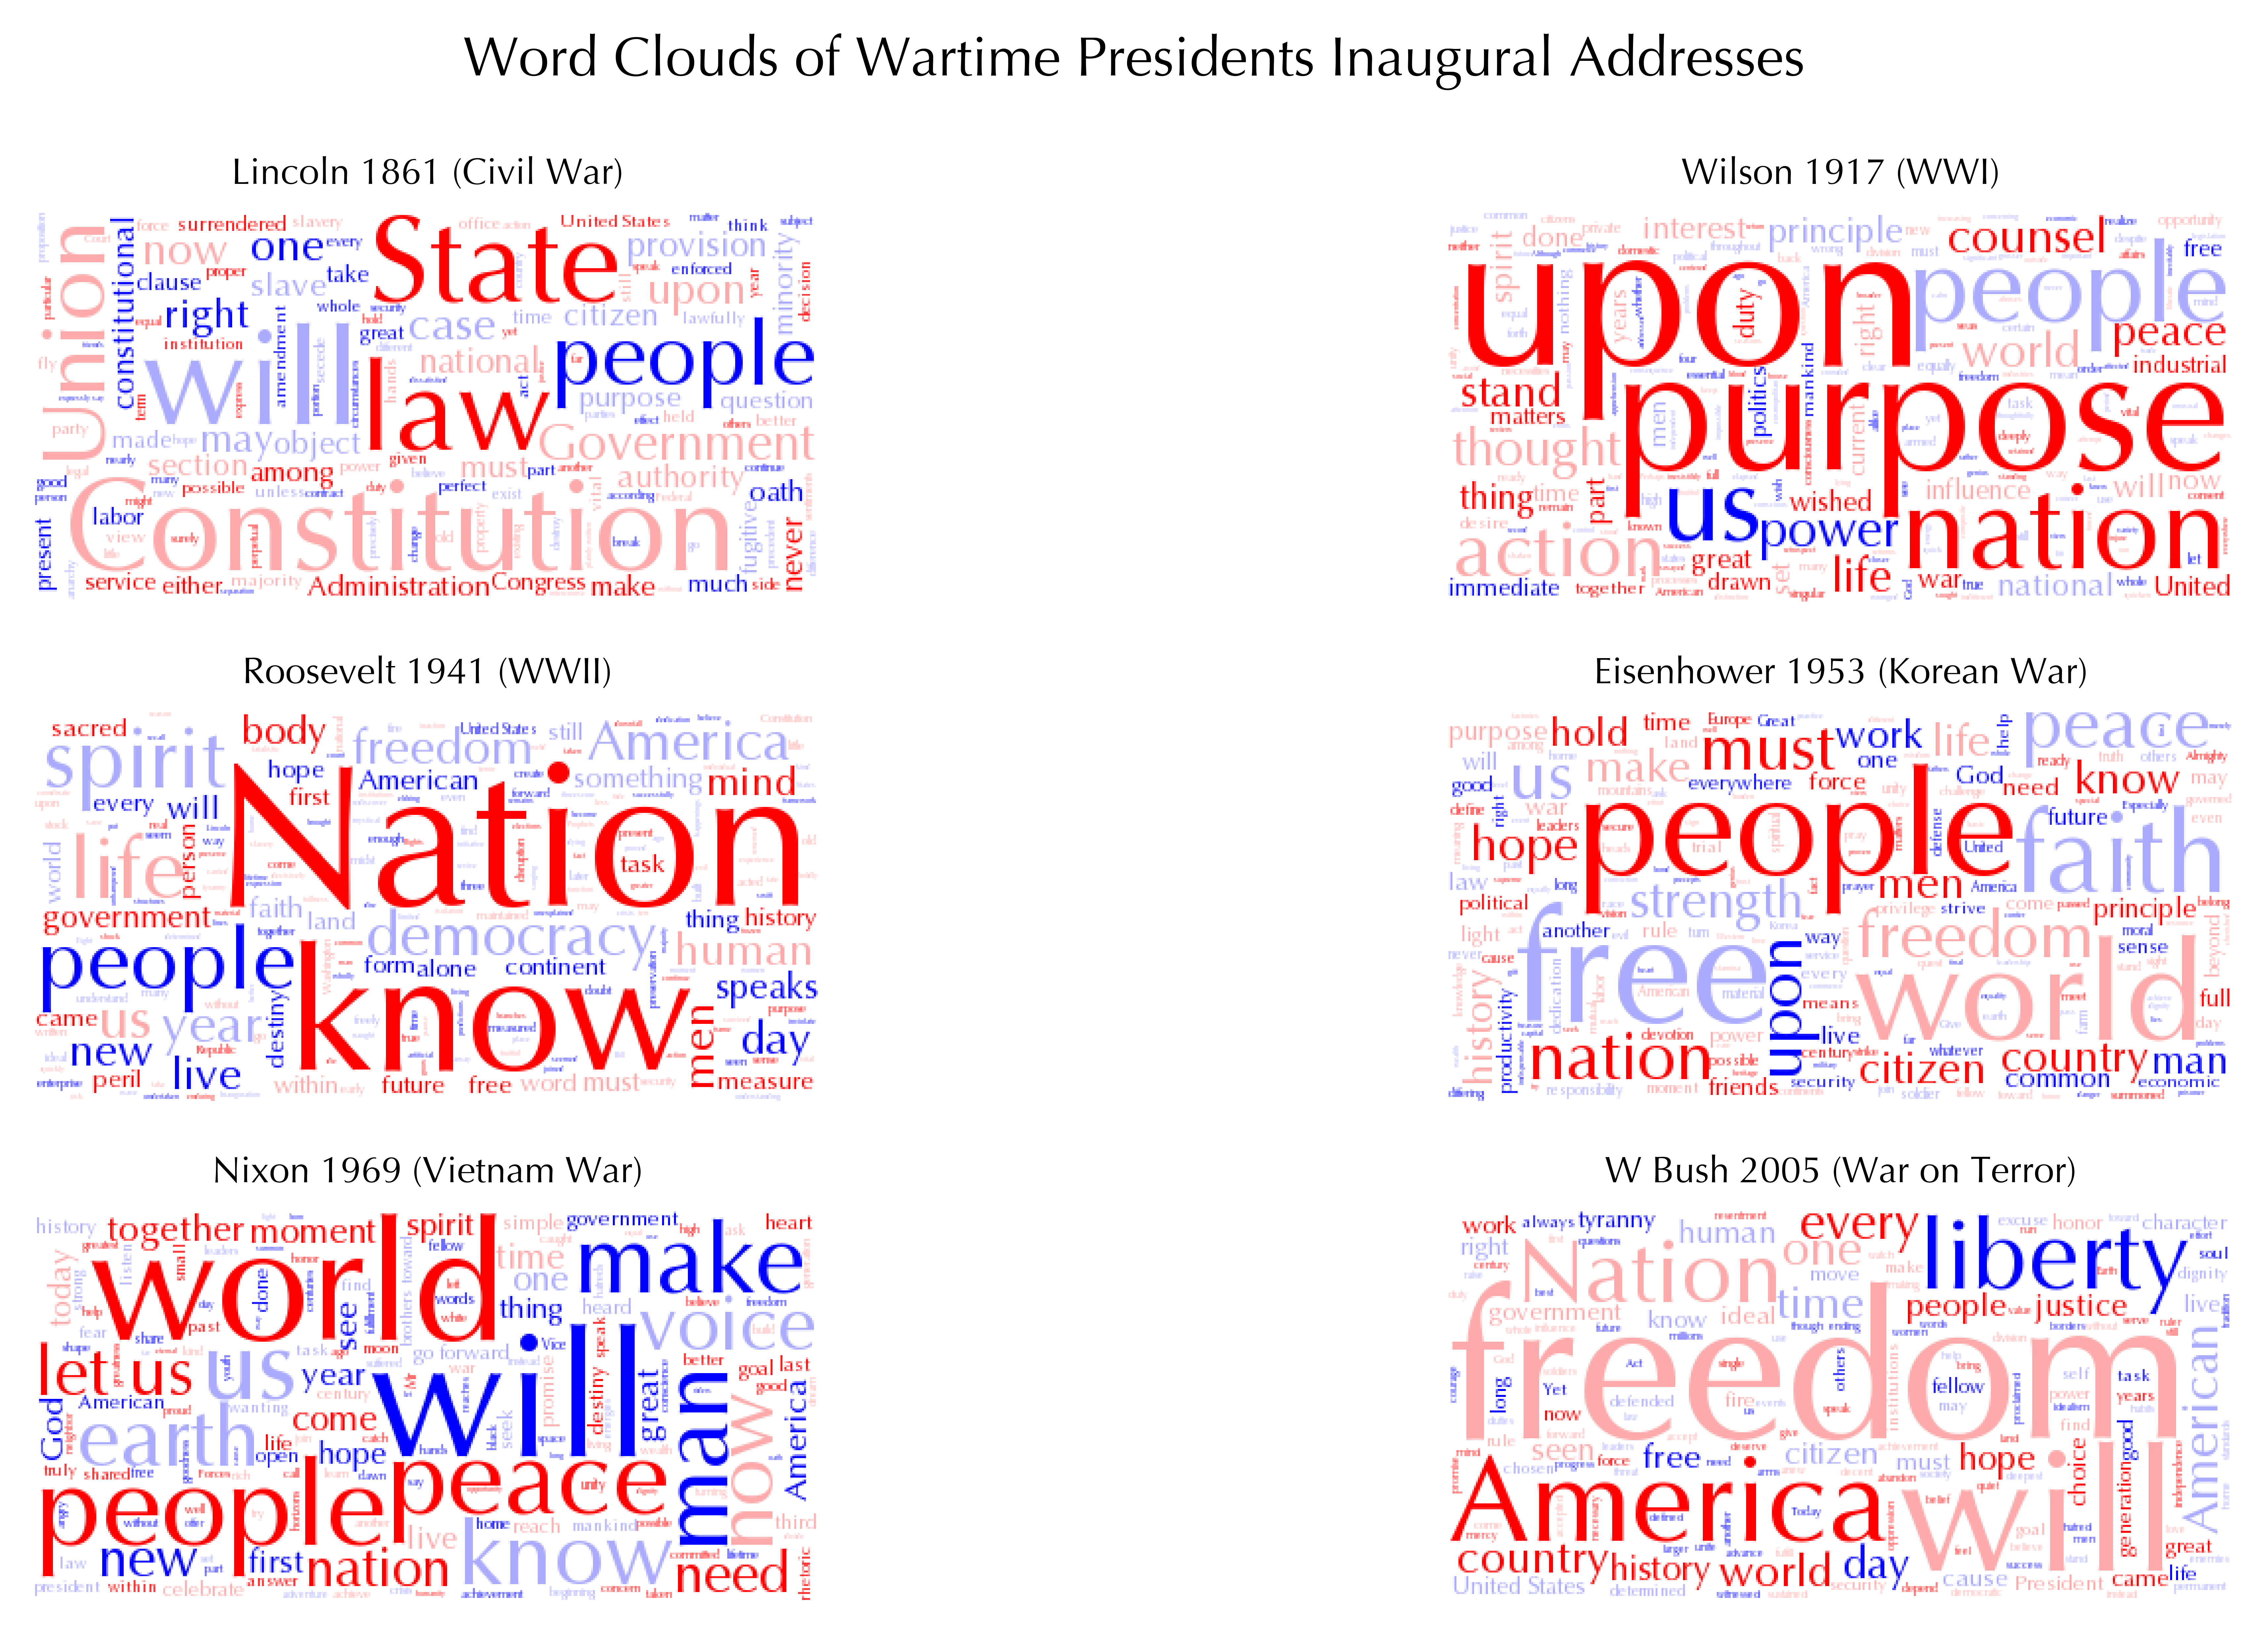

In [7]:
# create word clouds
cloud_plot(clouds, titles)

These word clouds hint that presidents turn to the bedrock of America in troubling times. Words like "liberty", "freedom", "nation", and "Constitution" are all prevalent among the addresses. Safeguarding American values like freedom is often a rationalization for the US to initiate and escalate war.

## Sentiment Analysis

The polarity and subjectivity of a president's sentences relate to the framing of each situation. 

In [8]:
# split speeches into sentences
lincoln_sent = split_sentences(lincoln)
wilson_sent = split_sentences(wilson)
roosevelt_sent = split_sentences(roosevelt)
eisenhower_sent = split_sentences(eisenhower)
nixon_sent = split_sentences(nixon)
wbush_sent = split_sentences(wbush)

In [9]:
# score each sentence
lincoln_score = score_sentences(lincoln_sent)
wilson_score = score_sentences(wilson_sent)
roosevelt_score = score_sentences(roosevelt_sent)
eisenhower_score = score_sentences(eisenhower_sent)
nixon_score = score_sentences(nixon_sent)
wbush_score = score_sentences(wbush_sent)

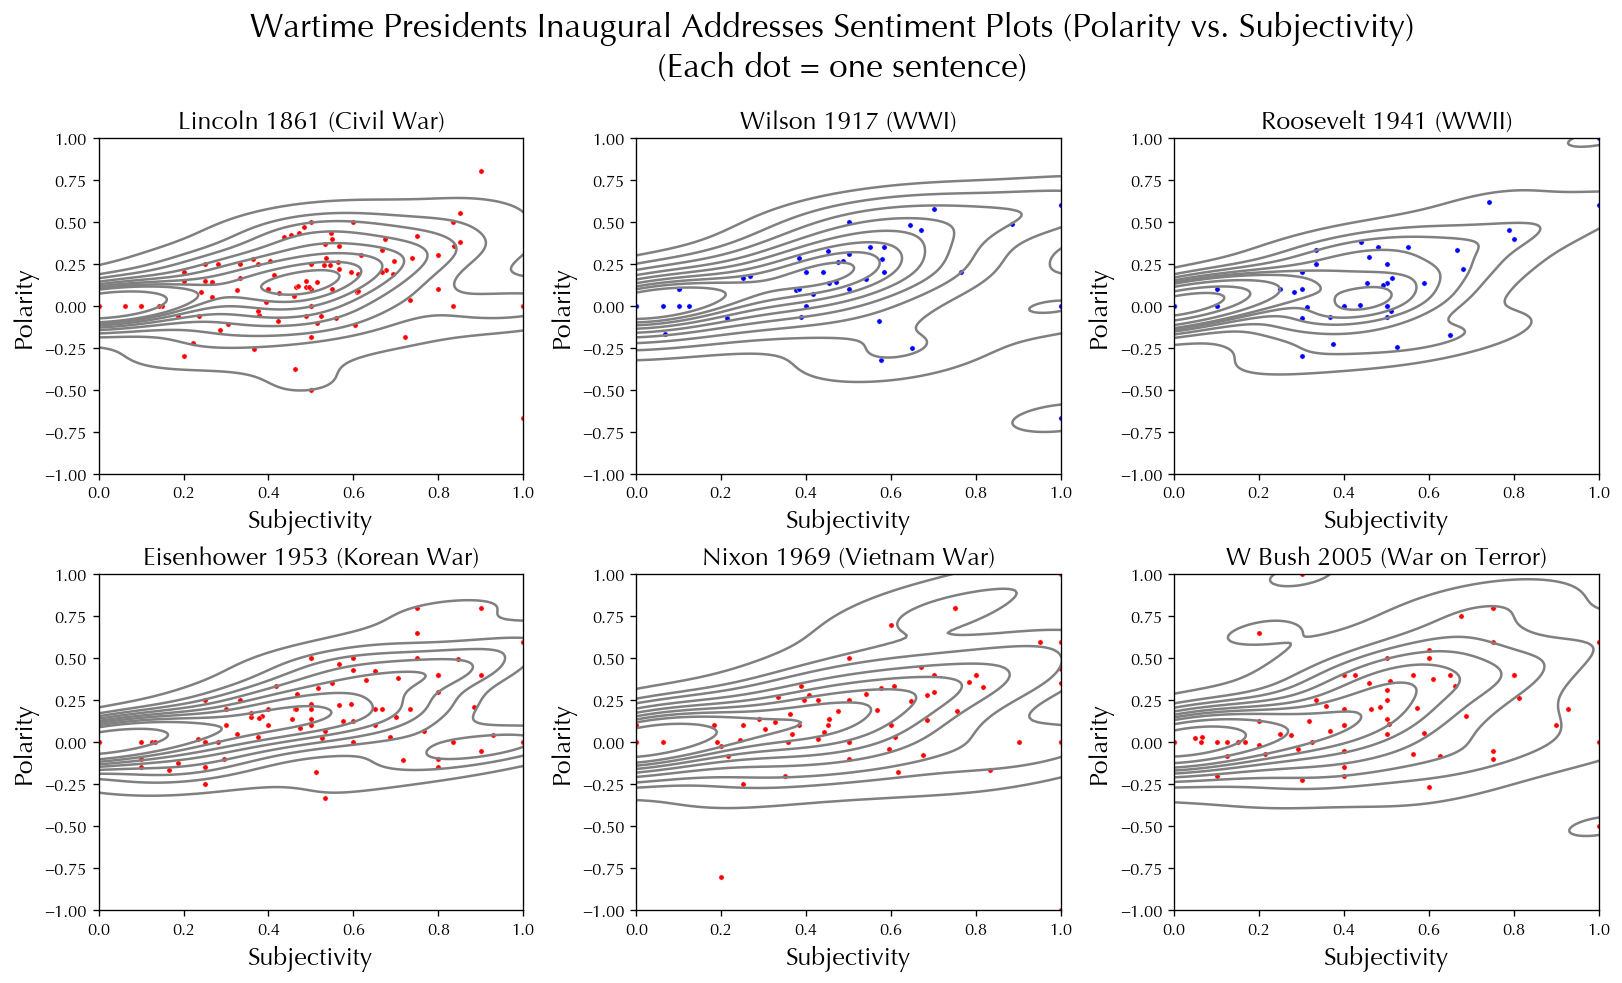

In [10]:
# plot sentence sentiments
pol_vs_subj_fig()

All of these speeches seem to trend towards more positive. It would be morale-boosting to spread a positive message during wartime. The three earliest speeches seem to have more negative sentences than the latest three speeches. 

Eisenhower's sentences seem to be particularly positive because he stressed the victory of light (American values) over dark in his speech, especially in the conclusion. Although Lincoln has many positive sentences, he also has some of the most negative ones. Lincoln use many sentences to condemn Southern states for seceding from the Union.

In conclusion, all presidents are more positive when they are more subjective. Presidets want to convey a message of positivity, but they are also expected to address reality and any negative events it may contain. While balancing these requirements, they are strategically passionate when optimistic and tend to be more factual and direct when delivering bad news.

In [11]:
# polarity dictionaries
lincoln_pols = create_pol_dict(lincoln_score)
wilson_pols = create_pol_dict(wilson_score)
roosevelt_pols = create_pol_dict(roosevelt_score)
eisenhower_pols = create_pol_dict(eisenhower_score)
nixon_pols = create_pol_dict(nixon_score)
wbush_pols = create_pol_dict(wbush_score)

# subjectivity dictionaries
lincoln_subs = create_subj_dict(lincoln_score)
wilson_subs = create_subj_dict(wilson_score)
roosevelt_subs = create_subj_dict(roosevelt_score)
eisenhower_subs = create_subj_dict(eisenhower_score)
nixon_subs = create_subj_dict(nixon_score)
wbush_subs = create_subj_dict(wbush_score)

In [12]:
# polarity moving averages
lincoln_pma = moving_average(lincoln_pols)
wilson_pma = moving_average(wilson_pols)
roosevelt_pma = moving_average(roosevelt_pols)
eisenhower_pma = moving_average(eisenhower_pols)
nixon_pma = moving_average(nixon_pols)
wbush_pma = moving_average(wbush_pols)

# subjectivity moving averages
lincoln_sma = moving_average(lincoln_subs)
wilson_sma = moving_average(wilson_subs)
roosevelt_sma = moving_average(roosevelt_subs)
eisenhower_sma = moving_average(eisenhower_subs)
nixon_sma = moving_average(nixon_subs)
wbush_sma = moving_average(wbush_subs)

It is also important to factor in the sequentiality of such data and how the mood of the speech changes through its course:

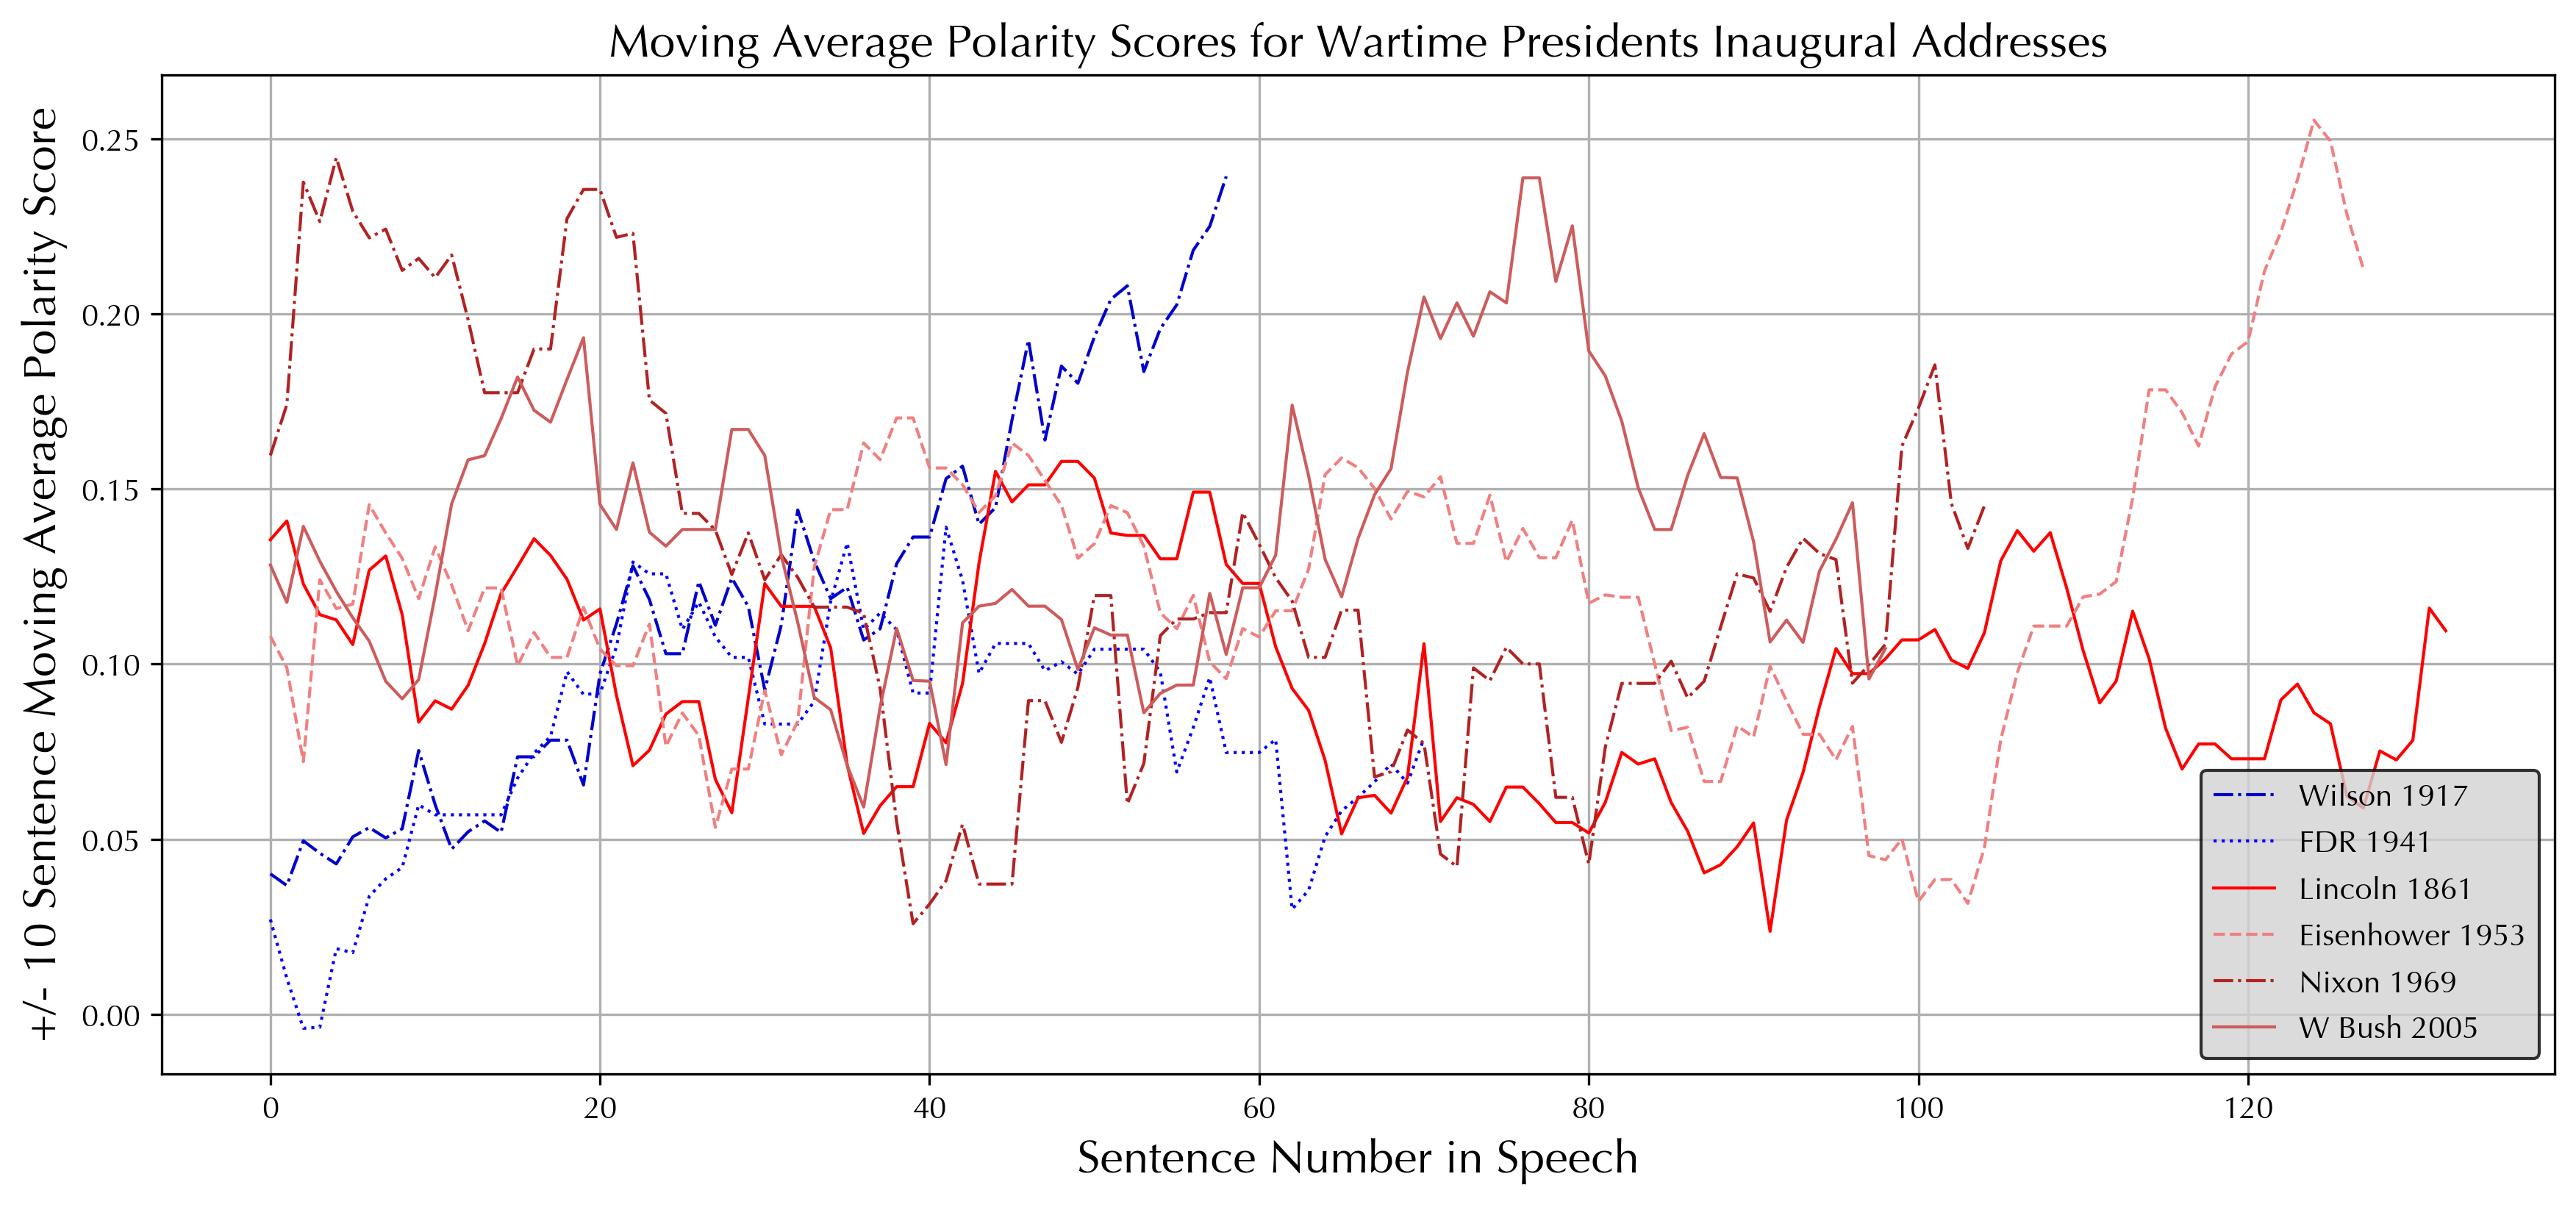

In [13]:
# plot polarity moving averages
plot_pres_polarity_ma(wilson_pma, roosevelt_pma, lincoln_pma, eisenhower_pma, nixon_pma, wbush_pma)

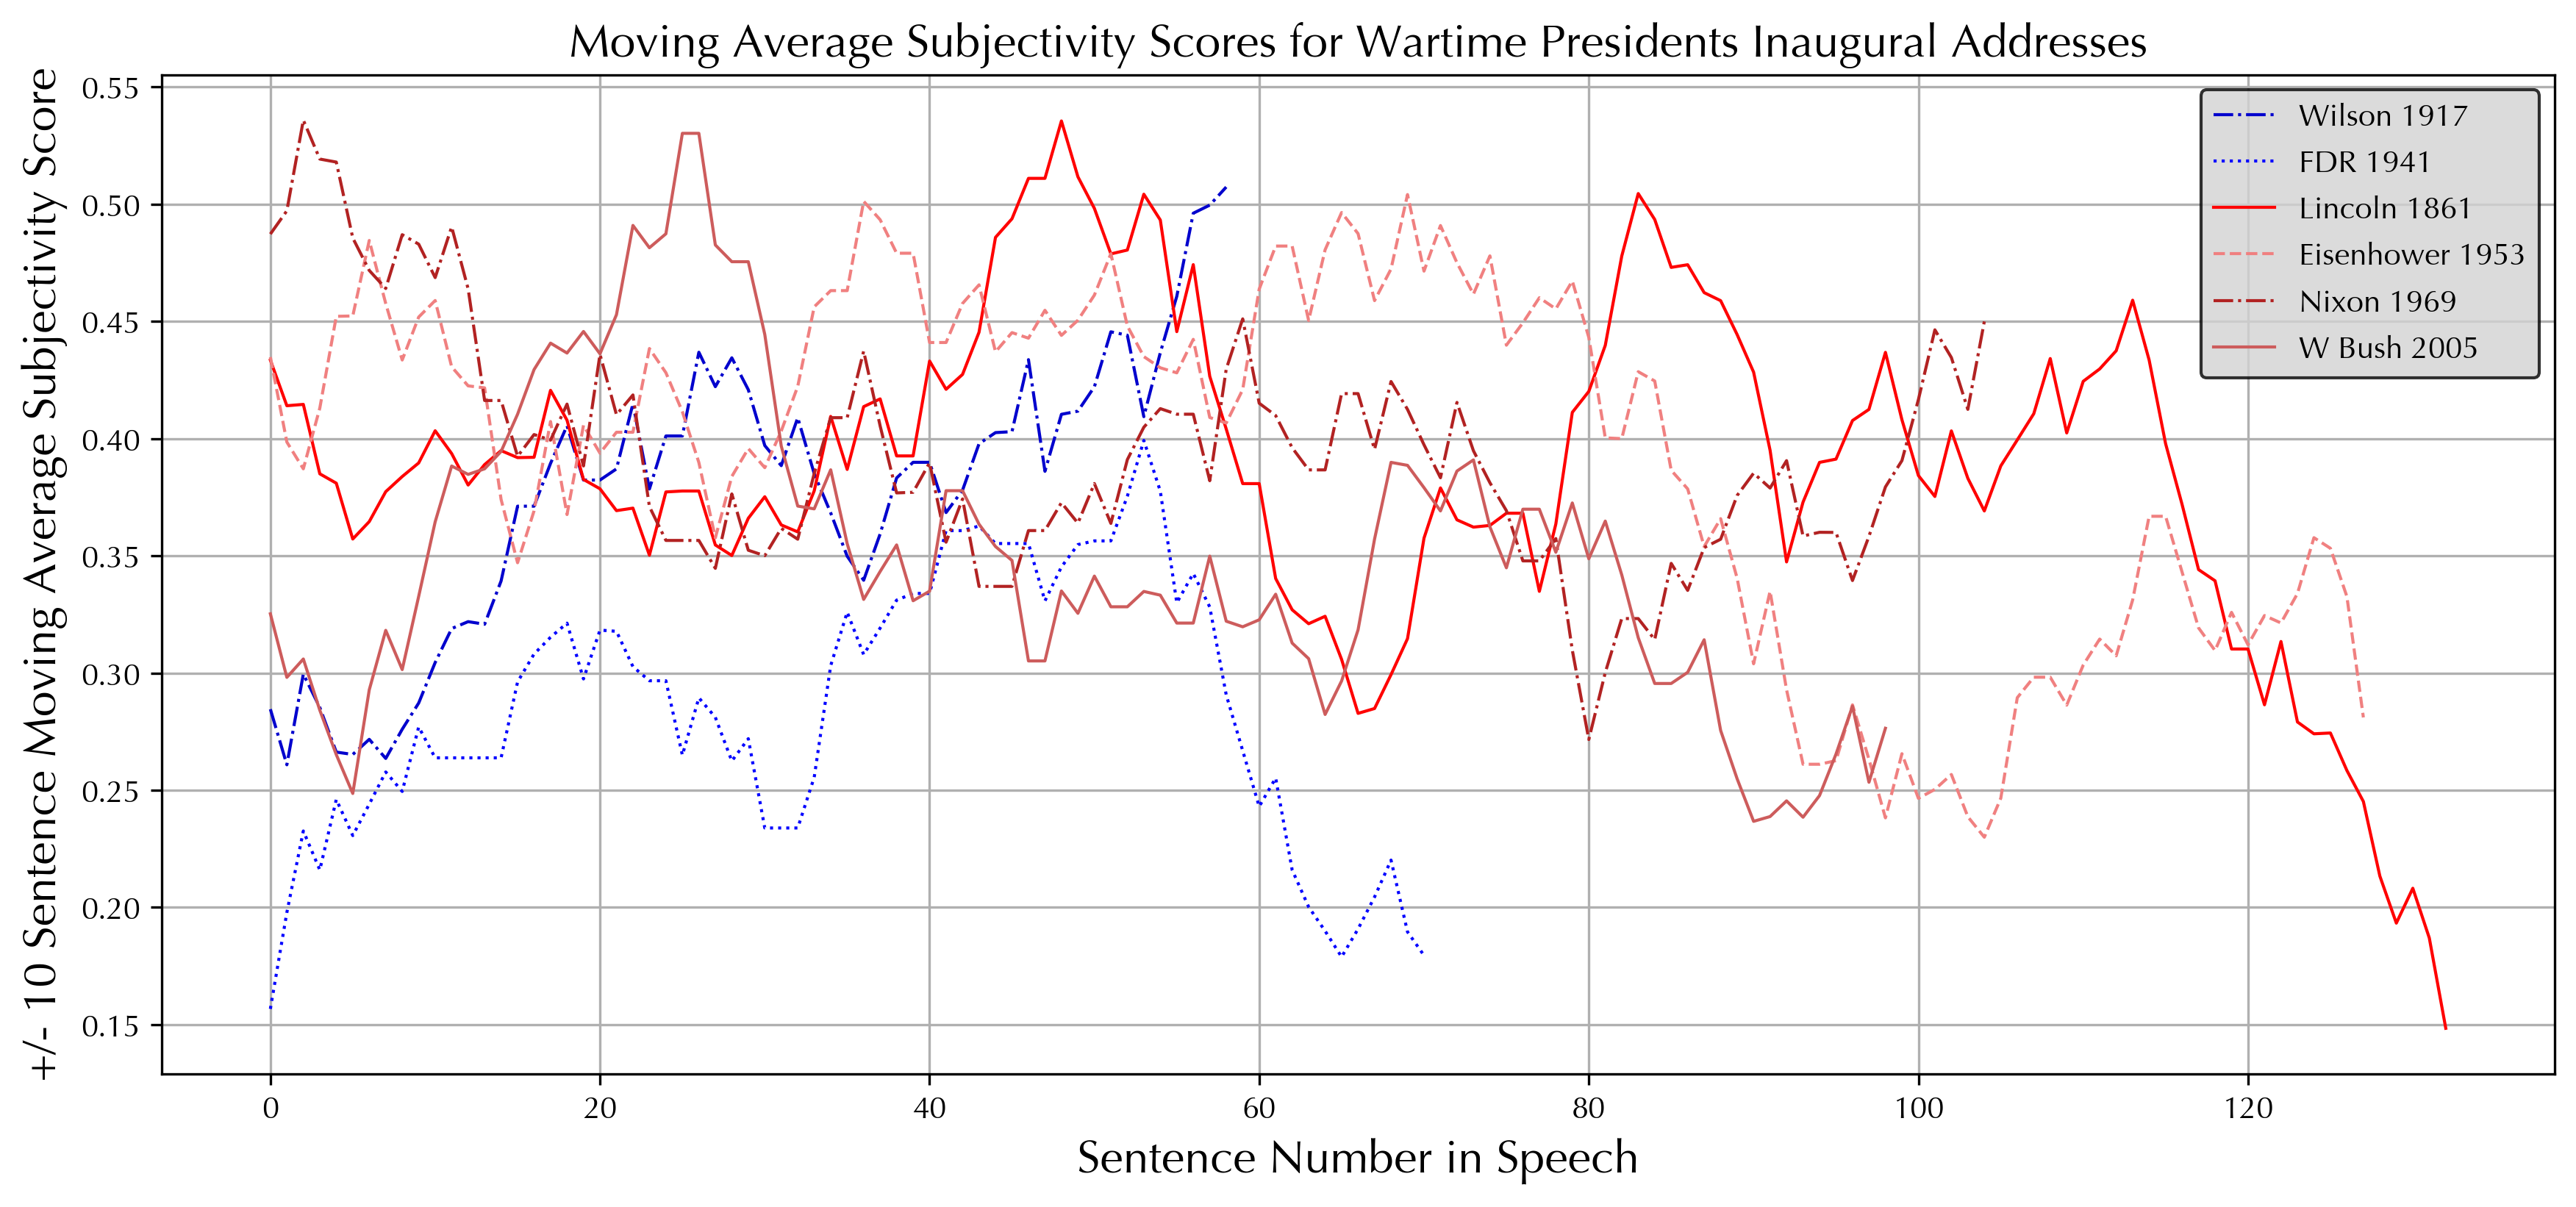

In [14]:
# plot subjectivity moving averages
plot_pres_subjectivity_ma(wilson_sma, roosevelt_sma, lincoln_sma, eisenhower_sma, nixon_sma, wbush_sma)

These graphs show sentiment over the course of each speech measured by sentence moving average. One notable finding is Wilson's uphill sentiment throughout his inaugural address. He works his way from a polarity score of 0 to around .25 by the end of the speech. He starts out by describing war on America's horizon but transitions to how the country will overcome this challenge.

It seems that other presidents' speeches progress with waves of sentiment. Eisenhower's speech ends on a positive note. Both of the Democrats seem to start their speeches with a more negative tone than the Republicans. In terms of subjectivity, Lincoln and FDR's speeches have rapid declines in subjectivity towards their endings. Lincoln concludes with statements such as "You have no conflict without being yourselves the aggressors" and "We are not enemies, but Friends." FDR concludes with a short factual story about George Washington and statements about the spirit of America.

## Vocab Similarity

Word choice provides a different avenue to compare the addresses. Word choice affects the connotation of a message and reflects the unique style of each president.

In [15]:
# separate into words
lincoln_clean = clean_speech(lincoln)
wilson_clean = clean_speech(wilson)
roosevelt_clean = clean_speech(roosevelt)
eisenhower_clean = clean_speech(eisenhower)
nixon_clean = clean_speech(nixon)
wbush_clean = clean_speech(wbush)

In [16]:
# dictionary (counter object) of word counts
lincoln_word_freq = word_freq_dict(lincoln_clean)
wilson_word_freq = word_freq_dict(wilson_clean)
roosevelt_word_freq = word_freq_dict(roosevelt_clean)
eisenhower_word_freq = word_freq_dict(eisenhower_clean)
nixon_word_freq = word_freq_dict(nixon_clean)
wbush_word_freq = word_freq_dict(wbush_clean)

In [17]:
# filter by word length
most_common_n = 100
word_len = 6

# dictionaries with 100 most common words of at least length 6
lincoln_long = len_freq_filter(lincoln_word_freq, most_common_n, word_len)
wilson_long = len_freq_filter(wilson_word_freq, most_common_n, word_len)
roosevelt_long = len_freq_filter(roosevelt_word_freq, most_common_n, word_len)
eisenhower_long = len_freq_filter(eisenhower_word_freq, most_common_n,word_len)
nixon_long = len_freq_filter(nixon_word_freq, most_common_n, word_len)
wbush_long = len_freq_filter(wbush_word_freq, most_common_n, word_len)

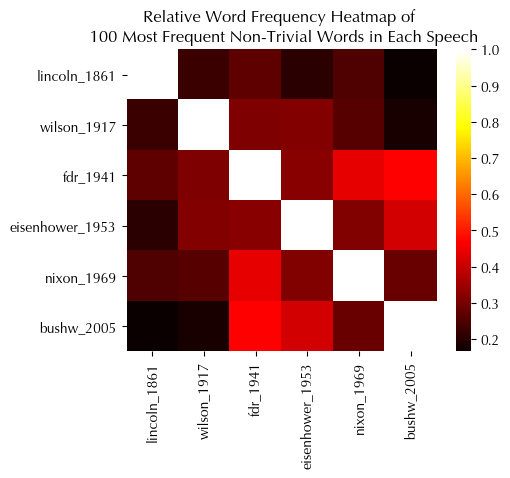

In [18]:
# Make a dictionary of lists
common_word_dict = {'lincoln_1861': lincoln_long, 'wilson_1917': wilson_long, 'fdr_1941': roosevelt_long, 'eisenhower_1953': eisenhower_long, 'nixon_1969': nixon_long, 'bushw_2005':wbush_long}

# create a set of worda (pass this a dictionary)
common_word_set = common_set(common_word_dict)

# create heatmap from dictionary vectors
create_heatmap(common_word_dict, common_word_set)

Surprisingly, FDR, George W. Bush, and Nixon constructed their addresses with similar vocabulary. Lincoln and Bush seem to have different speeches in terms of vocabulary. Lincoln used more complex vocabulary, while Bush opted for plainer speech.

In [19]:
# list of all words in all speeches
most_common_n2 = 2

lincoln_top = len_freq_filter(lincoln_word_freq, most_common_n2, word_len)
wilson_top = len_freq_filter(wilson_word_freq, most_common_n2, word_len)
roosevelt_top = len_freq_filter(roosevelt_word_freq, most_common_n2, word_len)
eisenhower_top = len_freq_filter(eisenhower_word_freq, most_common_n2,word_len)
nixon_top = len_freq_filter(nixon_word_freq, most_common_n2, word_len)
wbush_top = len_freq_filter(wbush_word_freq, most_common_n2, word_len)

In [20]:
# Create set of two most frequent words among each speech
freq_top_list = [lincoln_top, wilson_top, roosevelt_top, eisenhower_top, nixon_top, wbush_top]

top_words = unique_keys(freq_top_list)

In [21]:
# Count words in each speech
lincoln_word_count = Counter(lincoln_clean)
wilson_word_count = Counter(wilson_clean)
roosevelt_word_count = Counter(roosevelt_clean)
eisenhower_word_count = Counter(eisenhower_clean)
nixon_word_count = Counter(nixon_clean)
wbush_word_count = Counter(wbush_clean)

A Sankey diagram is particularly useful in detailing the similarities and the degree of these similarities:

In [29]:
# create df and sankey
word_counts = [lincoln_word_count, wilson_word_count, roosevelt_word_count, 
               eisenhower_word_count, nixon_word_count, wbush_word_count]

common_word_df = sankey_df(titles, word_counts, top_words)

make_sankey(common_word_df, 'Speech', 'Word', 'Count')

As in the word clouds, this Sankey diagram shows common words associated with American values. These presidents commonly use "people", "freedom", and "constitution". Freedom is not only used to apply to freedom of American people, but freedom of those affected by the foreign wars. The use of "democracy" is mostly limited to FDR's address while the word "voices" is more unique to Nixon's. These isolated words hint at the themes of each address. For example, Nixon uses the word "voices" to talk about the different viewpoints on the Vietnam war.

## Inaugural Address Structure

Sentence length and punctuation affect the cadence of each speech

In [23]:
# Get list of sentence lengths for each president
lincoln_sent_lengths = sentence_lengths(lincoln_sent)
wilson_sent_lengths = sentence_lengths(wilson_sent)
roosevelt_sent_lengths = sentence_lengths(roosevelt_sent)
eisenhower_sent_lengths = sentence_lengths(eisenhower_sent)
nixon_sent_lengths = sentence_lengths(nixon_sent)
wbush_sent_lengths = sentence_lengths(wbush_sent)

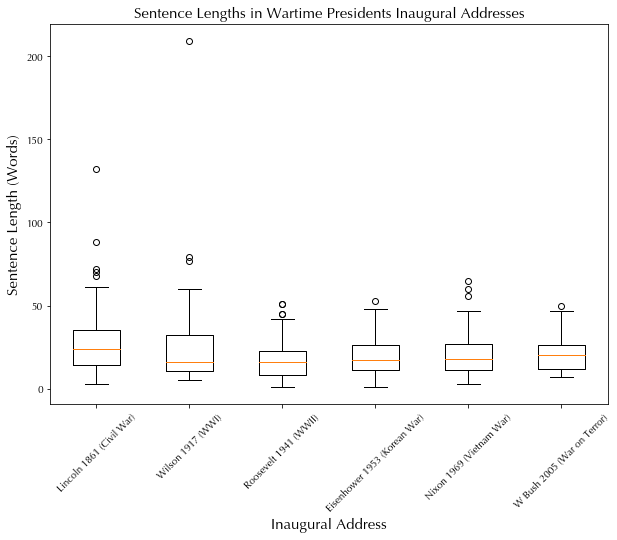

In [24]:
# Boxplots for sentence lengths
data = [lincoln_sent_lengths, wilson_sent_lengths, roosevelt_sent_lengths, eisenhower_sent_lengths, nixon_sent_lengths, wbush_sent_lengths]
title = "Sentence Lengths in Wartime Presidents Inaugural Addresses"
xlabel = "Inaugural Address"
ylabel = "Sentence Length (Words)"
    
pres_box_plot(data, title, xlabel, ylabel)

Lincoln has particularly long sentences with a median sentence length of around 20 words. Sometimes he delivers long flowery sentences to illustrate his points. FDR has the shortest sentences. FDR's paralytic illness (assumed to be polio) may have affected his breathing and limited the amount of words he could fit into a sentence.

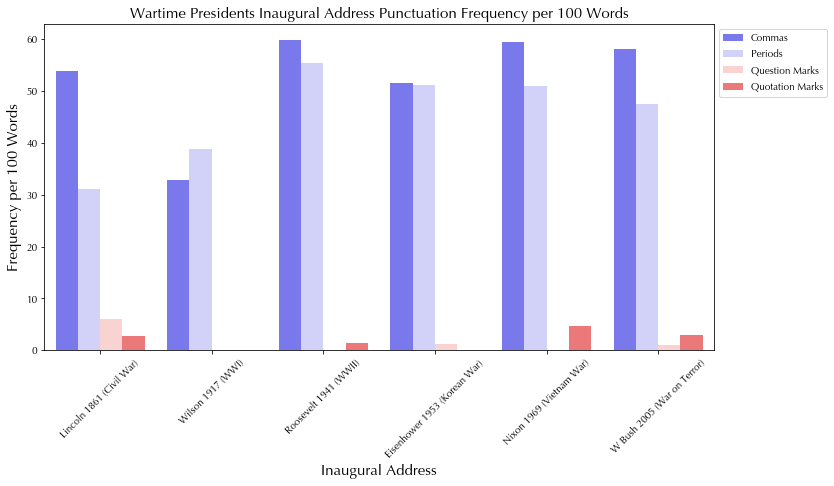

In [30]:
raw_texts_dict = {title: raw_text for title, raw_text in zip(titles,[lincoln, wilson, roosevelt, eisenhower, nixon, wbush])}

comma_freq_dict = freq_per_n_words(raw_texts_dict, ',', 1000)
period_freq_dict = freq_per_n_words(raw_texts_dict, '.', 1000)
question_freq_dict = freq_per_n_words(raw_texts_dict, '?', 1000)
quotation_freq_dict = freq_per_n_words(raw_texts_dict, "\"", 1000)

freq_dict_list = [comma_freq_dict, period_freq_dict, question_freq_dict, quotation_freq_dict]
freq_df = make_freq_df(freq_dict_list, ["Commas", "Periods", "Question Marks", "Quotation Marks"], 100)

title = "Wartime Presidents Inaugural Address Punctuation Frequency per 100 Words"
pres_df_bar(freq_df, title)

Lincoln is asking many questions. Reading over his address, they seem to be mostly rhetorical questions arguing against secession from the Union. This graph also points to Lincoln having longer sentences with much fewer periods per 100 words than the other wartime presidents. FDR has many more periods and commas, implying more breaks in his speech. Nixon seems to draw on many different sources in his address with many direct quotes.

## Conclusion

Presidents do not follow a recipe when constructing their speeches; they each have their own unique style of deliverance. The style of each speech cannot be compared in complete isolation. The characteristics of each conflict affect structure and style. However, it can be said that each president stays true to the core theme of unity to strengthen support for American values. In current times of division, it is reassuring to know that in even the most severe episodes of history when American unity has shattered, it has always restabilized and persisted. 